In [81]:
from dike_model_function import DikeNetwork
import dike_model_optimization
import dike_model_simulation
import problem_formulation
from ema_workbench import Policy, perform_experiments, optimize
from ema_workbench import ema_logging
import ema_workbench
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [82]:
model = problem_formulation.get_model_for_problem_formulation(3)
ema_logging.log_to_stderr(ema_logging.INFO)
n_scenarios = 500
n_policies = 500

[MainProcess/INFO] model initialized


In [83]:
len(model.outcomes.keys())

17

In [84]:
policies = [
Policy( "RfR 0", ** {'A.1_DikeIncrease': 0,'A.2_DikeIncrease': 0,'A.3_DikeIncrease': 0,'A.4_DikeIncrease': 10,'A.5_DikeIncrease': 0, 'EWS_DaysToThreat': 0, '0_RfR': 1,  '1_RfR': 0,  '2_RfR': 0,  '3_RfR': 0,  '4_RfR': 1}),
Policy( "RfR 1", ** {'A.1_DikeIncrease': 0,'A.2_DikeIncrease': 10,'A.3_DikeIncrease': 0,'A.4_DikeIncrease': 0,'A.5_DikeIncrease': 10, 'EWS_DaysToThreat': 1, '0_RfR': 0,  '1_RfR': 1,  '2_RfR': 0,  '3_RfR': 0,  '4_RfR': 0}),
Policy( "RfR 2", ** {'A.1_DikeIncrease': 0,'A.2_DikeIncrease': 0,'A.3_DikeIncrease': 10,'A.4_DikeIncrease': 10,'A.5_DikeIncrease': 10, 'EWS_DaysToThreat': 2, '0_RfR': 0,  '1_RfR': 0,  '2_RfR': 1,  '3_RfR': 0,  '4_RfR': 0}),
Policy( "RfR 3", ** {'A.1_DikeIncrease': 10,'A.2_DikeIncrease': 0,'A.3_DikeIncrease': 10,'A.4_DikeIncrease': 10,'A.5_DikeIncrease': 0, 'EWS_DaysToThreat': 3, '0_RfR': 0,  '1_RfR': 1,  '2_RfR': 0,  '3_RfR': 1,  '4_RfR': 0}),
Policy( "RfR 4", ** {'A.1_DikeIncrease': 10,'A.2_DikeIncrease': 10,'A.3_DikeIncrease': 0,'A.4_DikeIncrease': 0,'A.5_DikeIncrease': 10, 'EWS_DaysToThreat': 4, '0_RfR': 1,  '1_RfR': 1,  '2_RfR': 1,  '3_RfR': 1,  '4_RfR': 1}),
Policy( "RfR 5", ** {'A.1_DikeIncrease': 10,'A.2_DikeIncrease': 0,'A.3_DikeIncrease': 10,'A.4_DikeIncrease': 10,'A.5_DikeIncrease': 0, 'EWS_DaysToThreat': 1, '0_RfR': 1,  '1_RfR': 1,  '2_RfR': 1,  '3_RfR': 1,  '4_RfR': 1})    
]    

In [85]:
results = perform_experiments(model, n_scenarios, policies = policies)

[MainProcess/INFO] performing 500 scenarios * 6 policies * 1 model(s) = 3000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1500 cases completed
[MainProcess/INFO] 1800 cases completed
[MainProcess/INFO] 2100 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 2700 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] experiments finished


In [86]:
experiments, outcomes = results

In [221]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
outcomes = pd.DataFrame(outcomes)
outcomes['Total Deaths'] = outcomes[['A.1_Expected Number of Deaths','A.2_Expected Number of Deaths',
                                    'A.3_Expected Number of Deaths','A.4_Expected Number of Deaths',
                                    'A.5_Expected Number of Deaths']].sum(axis=1)
outcomes['Total Damage'] = outcomes[['A.1_Expected Annual Damage','A.2_Expected Annual Damage',
                                    'A.3_Expected Annual Damage','A.4_Expected Annual Damage',
                                    'A.5_Expected Annual Damage']].sum(axis=1)


sns.pairplot(pd.DataFrame.from_dict(outcomes['Total Damage','Total Deaths']))
plt.show()





KeyError: ('Total Damage', 'Total Deaths')

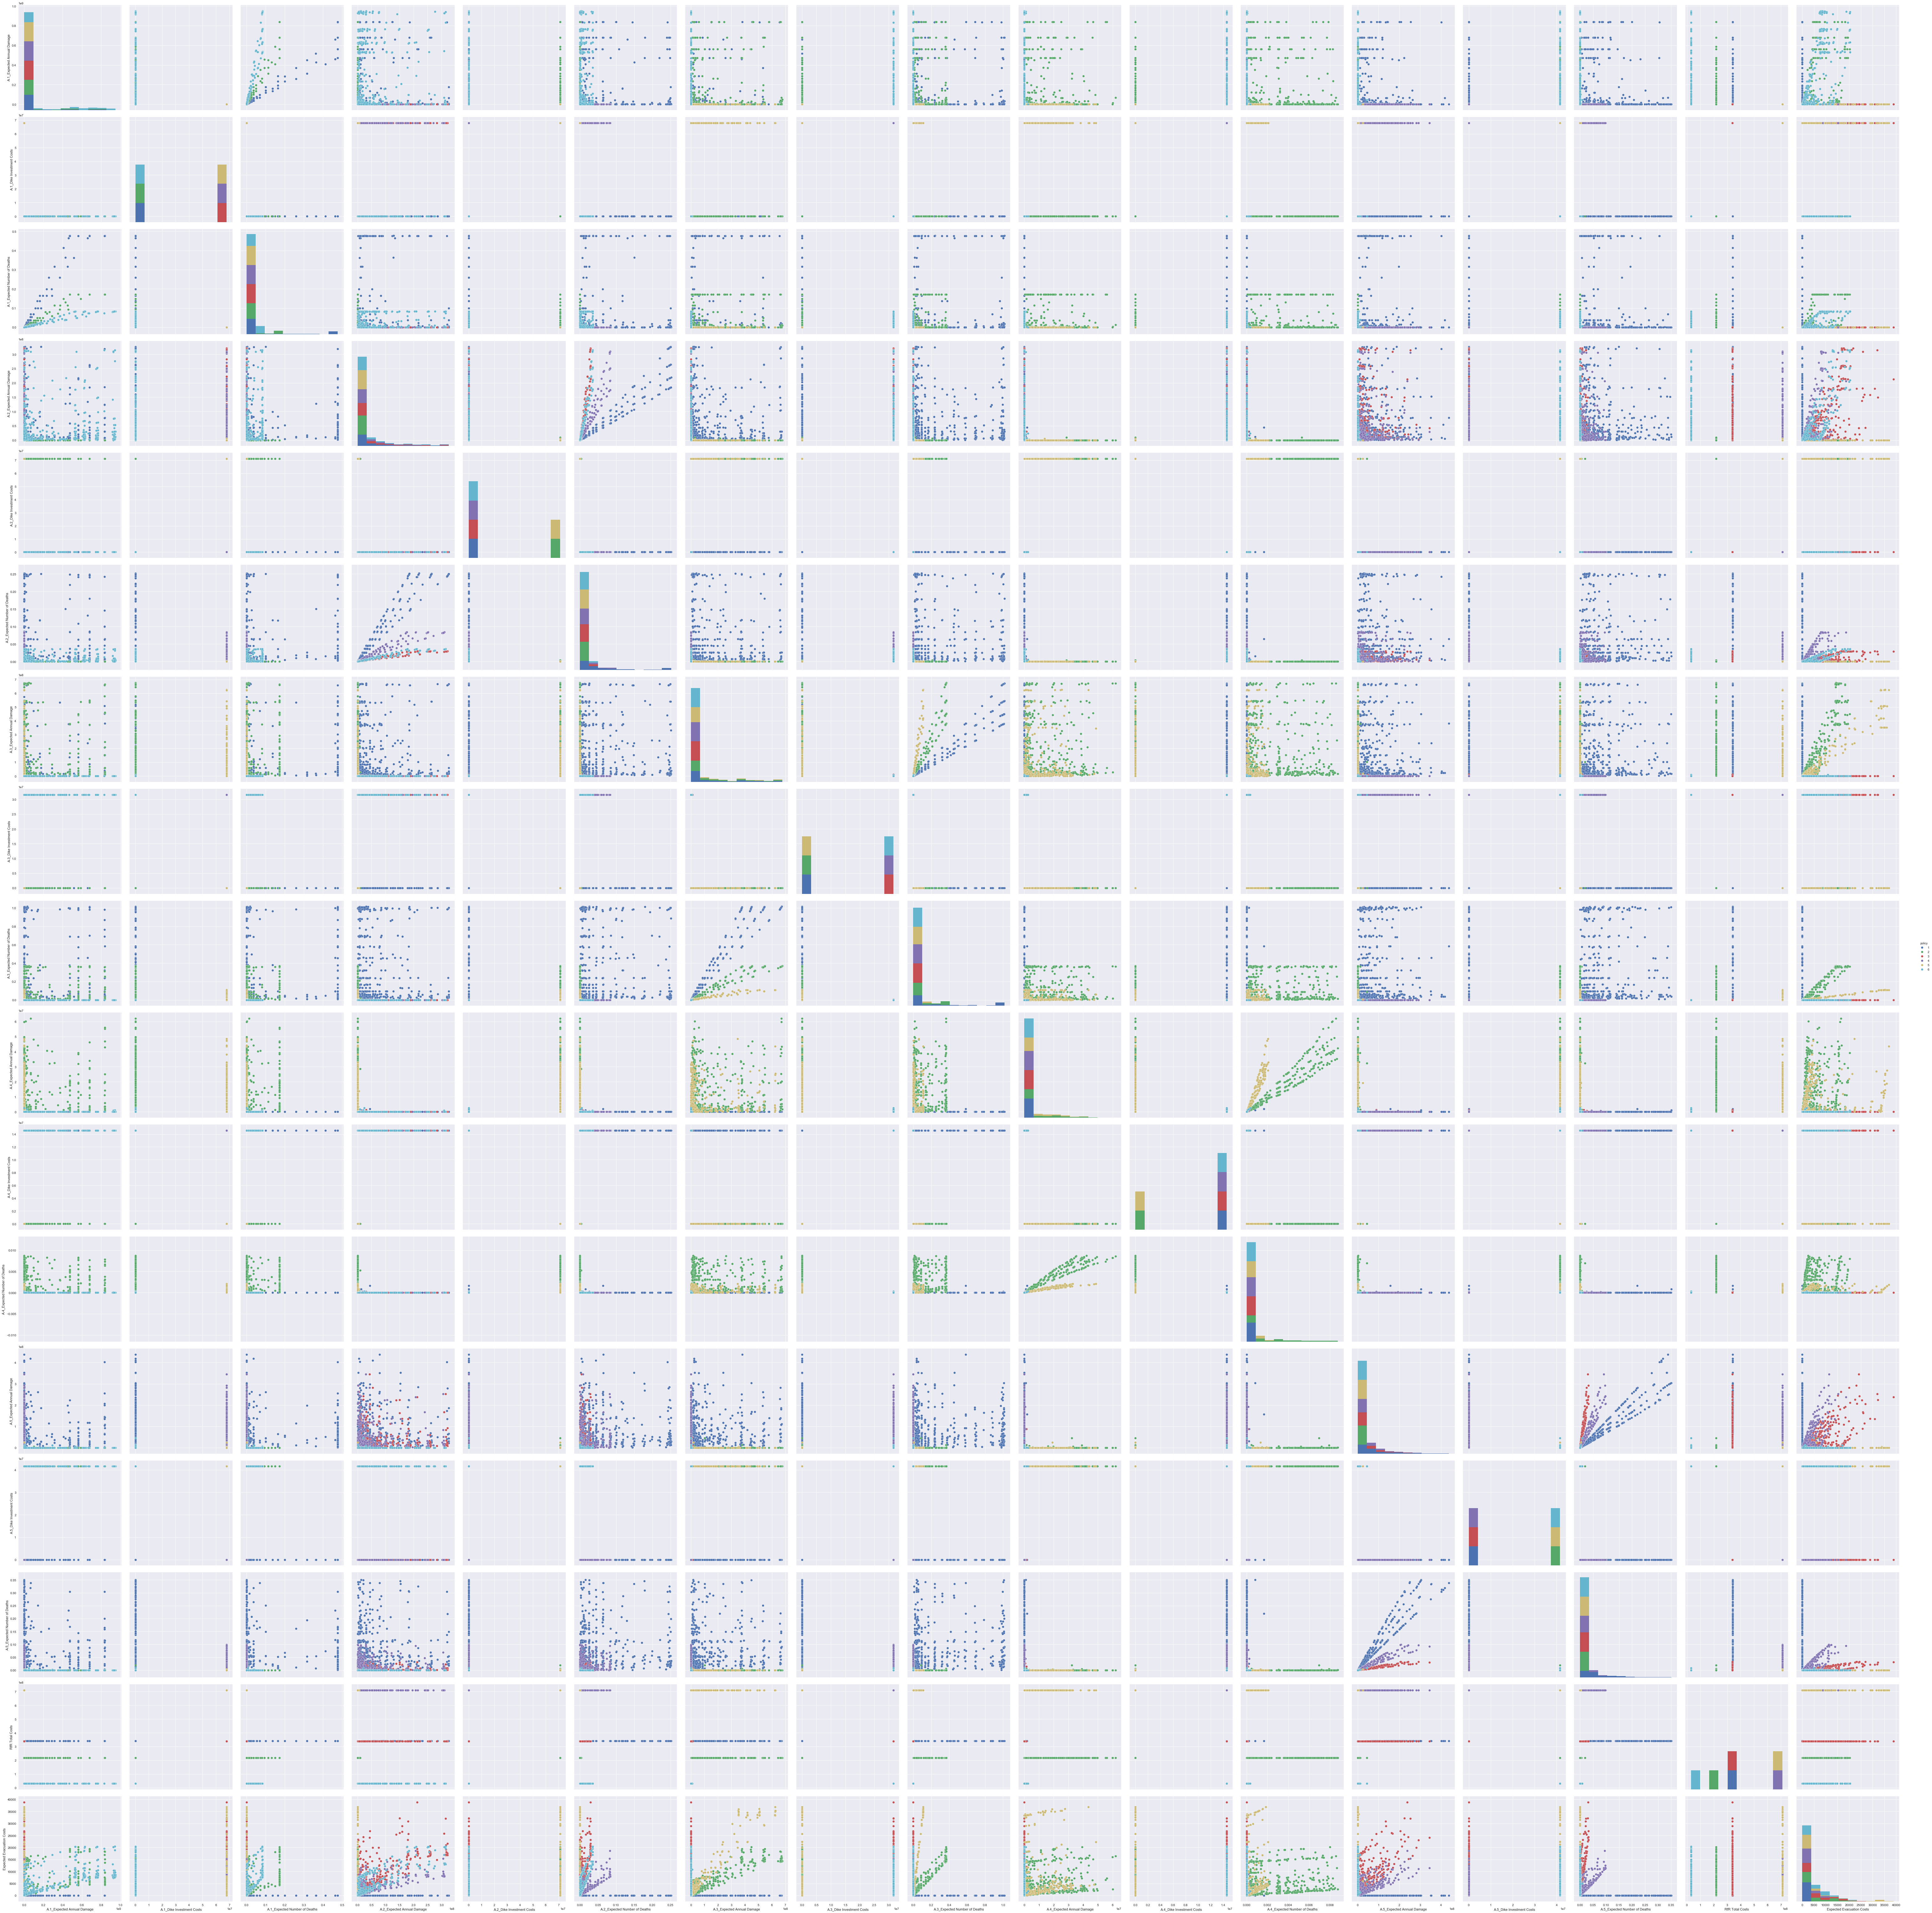

KeyError: 'Total Investment Costs'

In [151]:

policy = np.copy(experiments["policy"])
for i, entry in enumerate(set(policy)):
    logical = policy==entry
    policy[logical] = str(i+1)

data = copy.copy(outcomes)
data["policy"] = policy
data = pd.DataFrame.from_dict(data)
sns.pairplot(data, hue="policy", vars=outcomes.keys(), size=5)
plt.show()



In [179]:
from ema_workbench.analysis.plotting import (lines, kde_over_time)
from ema_workbench.analysis.plotting_util import KDE
from ema_workbench.analysis.pairs_plotting import (pairs_lines,pairs_scatter,pairs_density)
import matplotlib.pyplot as plt
def slice_endswith(sourcedict, string):
    newdict = {}
    for key in sourcedict.keys():
        if key.endswith(string):
            newdict[key] = sourcedict[key]
    return newdict

def slice_startswith(sourcedict, string):
    newdict = {}
    for key in sourcedict.keys():
        if key.startswith(string):
            newdict[key] = sourcedict[key]
    return newdict

Deaths = pd.DataFrame(slice_endswith(outcomes, "Deaths"))
Costs = pd.DataFrame(slice_endswith(outcomes, "Costs"))
Damage = pd.DataFrame(slice_endswith(outcomes, "Damage"))
A1 = pd.DataFrame(slice_startswith(outcomes, "A.1"))
A2 = pd.DataFrame(slice_startswith(outcomes, "A.2"))
A3 = pd.DataFrame(slice_startswith(outcomes, "A.3"))
A4 = pd.DataFrame(slice_startswith(outcomes, "A.4"))
A5 = pd.DataFrame(slice_startswith(outcomes, "A.5"))



In [90]:
Deaths

A.1_Expected Number of Deaths  A.2_Expected Number of Deaths  \
0                          0.000000                       0.035496   
1                          0.000000                       0.007218   
2                          0.000000                       0.012422   
3                          0.000000                       0.063402   
4                          0.000000                       0.062565   
5                          0.037604                       0.012911   
6                          0.000000                       0.010271   
7                          0.000000                       0.018238   
8                          0.000000                       0.025767   
9                          0.000000                       0.250040   
10                         0.000000                       0.118864   
11                         0.001944                       0.015254   
12                         0.000000                       0.036135   
13                         0.022106                       0.025616   
14                         0.014417                       0.036186   
15                         0.476689                       0.015313   
16                         0.004257                       0.010163   
17                         0.037290                       0.002789   
18                         0.037310                       0.247957   
19                         0.000000                       0.100759   
20                         0.000000                       0.017165   
21                         0.000000                       0.246302   
22                         0.000000                       0.002778   
23                         0.000000                       0.010172   
24                         0.476736                       0.045122   
25                         0.004215                       0.002819   
26                         0.000000                       0.007069   
27                         0.004383                       0.250688   
28                         0.004386                       0.250352   
29                         0.099603                       0.000000   
...                             ...                            ...   
2970                       0.000000                       0.012323   
2971                       0.000000                       0.001949   
2972                       0.000000                       0.004422   
2973                       0.000000                       0.002448   
2974                       0.000000                       0.003521   
2975                       0.000000                       0.015191   
2976                       0.000000                       0.000989   
2977                       0.000000                       0.082237   
2978                       0.000000                       0.083291   
2979                       0.000000                       0.006185   
2980                       0.000000                       0.021632   
2981                       0.000000                       0.003475   
2982                       0.000000                       0.001910   
2983                       0.000000                       0.008776   
2984                       0.000000                       0.000980   
2985                       0.000000                       0.000984   
2986                       0.000000                       0.003559   
2987                       0.000000                       0.021458   
2988                       0.000000                       0.002457   
2989                       0.000000                       0.005277   
2990                       0.000000                       0.008867   
2991                       0.000000                       0.003569   
2992                       0.000000                       0.000224   
2993                       0.000000                       0.000441   
2994                       0.000000                       0.001600   
2995            

In [91]:
Costs

A.1_Dike Investment Costs  A.2_Dike Investment Costs  \
0                  0.000000e+00                        0.0   
1                  0.000000e+00                        0.0   
2                  0.000000e+00                        0.0   
3                  0.000000e+00                        0.0   
4                  0.000000e+00                        0.0   
5                  0.000000e+00                        0.0   
6                  0.000000e+00                        0.0   
7                  0.000000e+00                        0.0   
8                  0.000000e+00                        0.0   
9                  0.000000e+00                        0.0   
10                 0.000000e+00                        0.0   
11                 0.000000e+00                        0.0   
12                 0.000000e+00                        0.0   
13                 0.000000e+00                        0.0   
14                 0.000000e+00                        0.0   
15                 0.000000e+00                        0.0   
16                 0.000000e+00                        0.0   
17                 0.000000e+00                        0.0   
18                 0.000000e+00                        0.0   
19                 0.000000e+00                        0.0   
20                 0.000000e+00                        0.0   
21                 0.000000e+00                        0.0   
22                 0.000000e+00                        0.0   
23                 0.000000e+00                        0.0   
24                 0.000000e+00                        0.0   
25                 0.000000e+00                        0.0   
26                 0.000000e+00                        0.0   
27                 0.000000e+00                        0.0   
28                 0.000000e+00                        0.0   
29                 0.000000e+00                        0.0   
...                         ...                        ...   
2970               6.796590e+07                        0.0   
2971               6.796590e+07                        0.0   
2972               6.796590e+07                        0.0   
2973               6.796590e+07                        0.0   
2974               6.796590e+07                        0.0   
2975               6.796590e+07                        0.0   
2976               6.796590e+07                        0.0   
2977               6.796590e+07                        0.0   
2978               6.796590e+07                        0.0   
2979               6.796590e+07                        0.0   
2980               6.796590e+07                        0.0   
2981               6.796590e+07                        0.0   
2982               6.796590e+07                        0.0   
2983               6.796590e+07                        0.0   
2984               6.796590e+07                        0.0   
2985               6.796590e+07                        0.0   
2986               6.796590e+07                        0.0   
2987               6.796590e+07                        0.0   
2988               6.796590e+07                        0.0   
2989               6.796590e+07                        0.0   
2990               6.796590e+07                        0.0   
2991               6.796590e+07                        0.0   
2992               6.796590e+07                        0.0   
2993               6.796590e+07                        0.0   
2994               6.796590e+07                        0.0   
2995               6.796590e+07                        0.0   
2996               6.796590e+07                        0.0   
2997               6.796590e+07                        0.0   
2998               6.796590e+07                        0.0   
2999               6.796590e+07                        0.0   

      A.3_Dike Investment Costs  A.4_Dike Investment Costs  \
0                  0.000000e+00               1.456712e+07   
1                  0.000000e+00      

In [92]:
Damage

A.1_Expected Annual Damage  A.2_Expected Annual Damage  \
0                   0.000000e+00                4.283251e+07   
1                   0.000000e+00                4.639702e+06   
2                   0.000000e+00                8.255552e+06   
3                   0.000000e+00                4.382822e+07   
4                   0.000000e+00                6.235816e+07   
5                   3.711477e+07                8.421288e+06   
6                   0.000000e+00                6.643398e+06   
7                   0.000000e+00                1.728967e+07   
8                   0.000000e+00                2.034761e+07   
9                   0.000000e+00                1.838376e+08   
10                  0.000000e+00                8.395344e+07   
11                  2.204911e+06                1.195709e+07   
12                  0.000000e+00                4.328326e+07   
13                  3.857362e+07                3.027155e+07   
14                  1.681747e+07                2.903050e+07   
15                  5.607922e+08                1.198079e+07   
16                  4.091922e+06                6.606858e+06   
17                  4.376390e+07                2.116209e+06   
18                  5.294105e+07                2.623606e+08   
19                  0.000000e+00                1.011874e+08   
20                  0.000000e+00                1.352930e+07   
21                  0.000000e+00                2.611783e+08   
22                  0.000000e+00                2.111984e+06   
23                  0.000000e+00                9.486335e+06   
24                  5.608350e+08                3.652404e+07   
25                  4.817678e+06                2.128542e+06   
26                  0.000000e+00                6.586157e+06   
27                  6.012206e+06                2.643025e+08   
28                  7.423307e+06                3.258606e+08   
29                  1.747440e+08                0.000000e+00   
...                          ...                         ...   
2970                0.000000e+00                2.364545e+07   
2971                0.000000e+00                4.200564e+06   
2972                0.000000e+00                1.453740e+07   
2973                0.000000e+00                6.455518e+06   
2974                0.000000e+00                6.477048e+06   
2975                0.000000e+00                5.219989e+07   
2976                0.000000e+00                2.539118e+06   
2977                0.000000e+00                3.064857e+08   
2978                0.000000e+00                2.071206e+08   
2979                0.000000e+00                1.386540e+07   
2980                0.000000e+00                7.487262e+07   
2981                0.000000e+00                9.233553e+06   
2982                0.000000e+00                5.026212e+06   
2983                0.000000e+00                1.976692e+07   
2984                0.000000e+00                2.089609e+06   
2985                0.000000e+00                2.532189e+06   
2986                0.000000e+00                6.512905e+06   
2987                0.000000e+00                7.447075e+07   
2988                0.000000e+00                5.348867e+06   
2989                0.000000e+00                1.171779e+07   
2990                0.000000e+00                2.967468e+07   
2991                0.000000e+00                9.360642e+06   
2992                0.000000e+00                4.012857e+05   
2993                0.000000e+00                1.129348e+06   
2994                0.000000e+00                4.175761e+06   
2995                0.000000e+00                3.116122e+06   
2996                0.000000e+00                1.416343e+07   
2997                0.000000e+00                5.193281e+06   
2998                0.000000e+00                4.515663e+06   
2999                0.000000e+00                4.266687e+07   

      A.3_Expected Annual Damage  A.4

In [93]:
import pandas as pd
df = np.copy(experiments["policy"])
df = pd.DataFrame.from_dict(df)
df_policies = df[0]

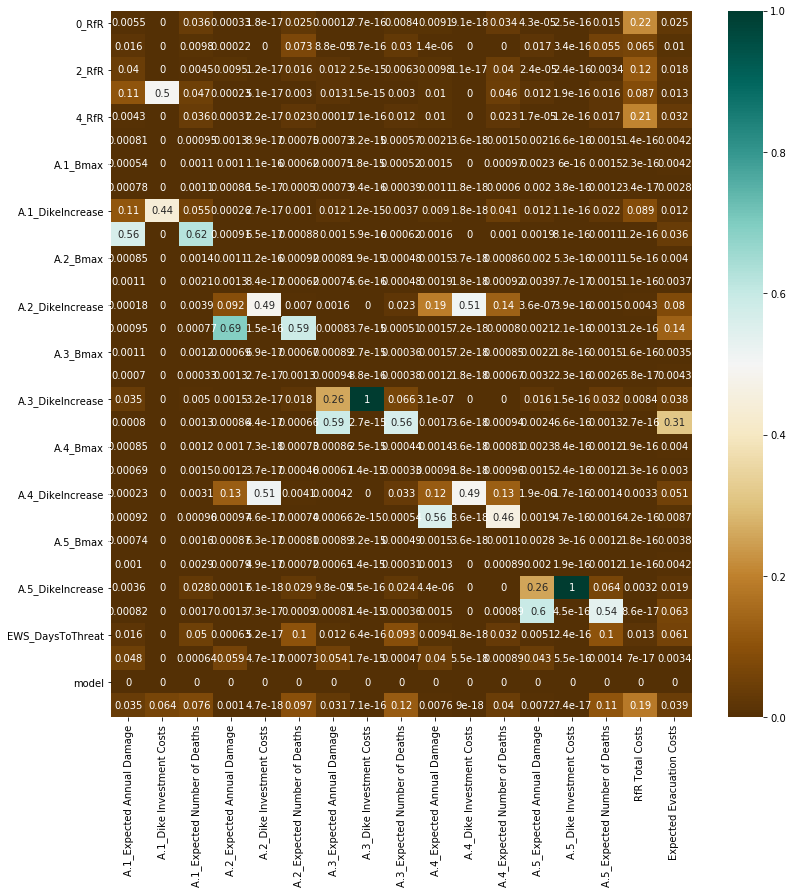

In [94]:
from ema_workbench.analysis import feature_scoring

x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
ax = sns.heatmap(fs, cmap='BrBG', annot = True)
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.show()

In [182]:

from ema_workbench.analysis import prim
outcomes = pd.DataFrame(outcomes)
outcomes['Total Deaths'] = outcomes[['A.1_Expected Number of Deaths','A.2_Expected Number of Deaths',
                                    'A.3_Expected Number of Deaths','A.4_Expected Number of Deaths',
                                    'A.5_Expected Number of Deaths']].sum(axis=1)

def classify(data):
    #get the output for deaths
    res1 = results[1]['Total Deaths']
from ema_workbench.analysis import prim
x = experiments
# have to set y threshold way higher: indicates that running no levers is not a good policy...
y = outcomes['Total Deaths'] < 0.5
prim_alg = prim.Prim(x,y,threshold=0.6)
set1 = prim_alg.find_box()

[MainProcess/INFO] 3000 points remaining, containing 2770 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.6766666666666666, coverage: 0.7328519855595668, density: 1.0 restricted_dimensions: 2


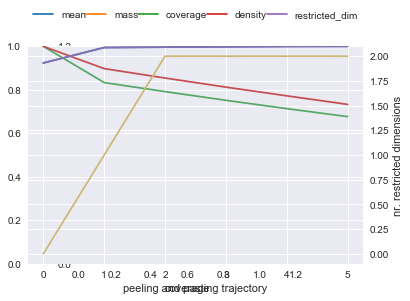

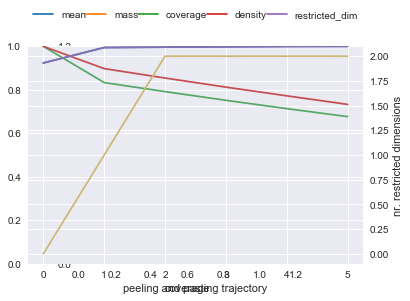

In [183]:
set1.show_tradeoff()
set1.show_ppt()

In [184]:
set1.inspect(4)
set1.inspect(2)

coverage    0.772202
density     0.999533
mass        0.713333
mean        0.999533
res dim            2
Name: 4, dtype: object

                     box 4                                    
                       min       max                 qp values
EWS_DaysToThreat  1.000000  4.000000  [1.2409982087401667e-52]
A.1_pfail         0.143578  0.998758   [7.878571767058976e-05]

coverage    0.854152
density     0.996211
mass        0.791667
mean        0.996211
res dim            2
Name: 2, dtype: object

                     box 2                                   
                       min       max                qp values
EWS_DaysToThreat  1.000000  4.000000  [4.891020412260908e-61]
A.1_pfail         0.049435  0.998758    [0.14617250031975365]



In [98]:
Costs.columns

Index(['A.1_Dike Investment Costs', 'A.2_Dike Investment Costs',
       'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs',
       'A.5_Dike Investment Costs', 'Expected Evacuation Costs',
       'RfR Total Costs'],
      dtype='object')

In [99]:
exp = pd.DataFrame(experiments)
out = pd.DataFrame(outcomes)
res = pd.concat((exp, out), axis = 1)
dfcosts = res[Costs.columns]
dfcosts['DikeHeighteningCosts'] = np.nan
for i in range(len(dfcosts)):
    dfcosts['DikeHeighteningCosts'][i] = dfcosts.sum(axis = 1)[i]
dfcosts

C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Varun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


A.1_Dike Investment Costs  A.2_Dike Investment Costs  \
0                  0.000000e+00                        0.0   
1                  0.000000e+00                        0.0   
2                  0.000000e+00                        0.0   
3                  0.000000e+00                        0.0   
4                  0.000000e+00                        0.0   
5                  0.000000e+00                        0.0   
6                  0.000000e+00                        0.0   
7                  0.000000e+00                        0.0   
8                  0.000000e+00                        0.0   
9                  0.000000e+00                        0.0   
10                 0.000000e+00                        0.0   
11                 0.000000e+00                        0.0   
12                 0.000000e+00                        0.0   
13                 0.000000e+00                        0.0   
14                 0.000000e+00                        0.0   
15                 0.000000e+00                        0.0   
16                 0.000000e+00                        0.0   
17                 0.000000e+00                        0.0   
18                 0.000000e+00                        0.0   
19                 0.000000e+00                        0.0   
20                 0.000000e+00                        0.0   
21                 0.000000e+00                        0.0   
22                 0.000000e+00                        0.0   
23                 0.000000e+00                        0.0   
24                 0.000000e+00                        0.0   
25                 0.000000e+00                        0.0   
26                 0.000000e+00                        0.0   
27                 0.000000e+00                        0.0   
28                 0.000000e+00                        0.0   
29                 0.000000e+00                        0.0   
...                         ...                        ...   
2970               6.796590e+07                        0.0   
2971               6.796590e+07                        0.0   
2972               6.796590e+07                        0.0   
2973               6.796590e+07                        0.0   
2974               6.796590e+07                        0.0   
2975               6.796590e+07                        0.0   
2976               6.796590e+07                        0.0   
2977               6.796590e+07                        0.0   
2978               6.796590e+07                        0.0   
2979               6.796590e+07                        0.0   
2980               6.796590e+07                        0.0   
2981               6.796590e+07                        0.0   
2982               6.796590e+07                        0.0   
2983               6.796590e+07                        0.0   
2984               6.796590e+07                        0.0   
2985               6.796590e+07                        0.0   
2986               6.796590e+07                        0.0   
2987               6.796590e+07                        0.0   
2988               6.796590e+07                        0.0   
2989               6.796590e+07                        0.0   
2990               6.796590e+07                        0.0   
2991               6.796590e+07                        0.0   
2992               6.796590e+07                        0.0   
2993               6.796590e+07                        0.0   
2994               6.796590e+07                        0.0   
2995               6.796590e+07                        0.0   
2996               6.796590e+07                        0.0   
2997               6.796590e+07                        0.0   
2998               6.796590e+07                        0.0   
2999               6.796590e+07                        0.0   

      A.3_Dike Investment Costs  A.4_Dike Investment Costs  \
0                  0.000000e+00               1.456712e+07   
1                  0.000000e+00      

In [100]:
res[Damage.columns]

A.1_Expected Annual Damage  A.2_Expected Annual Damage  \
0                   0.000000e+00                4.283251e+07   
1                   0.000000e+00                4.639702e+06   
2                   0.000000e+00                8.255552e+06   
3                   0.000000e+00                4.382822e+07   
4                   0.000000e+00                6.235816e+07   
5                   3.711477e+07                8.421288e+06   
6                   0.000000e+00                6.643398e+06   
7                   0.000000e+00                1.728967e+07   
8                   0.000000e+00                2.034761e+07   
9                   0.000000e+00                1.838376e+08   
10                  0.000000e+00                8.395344e+07   
11                  2.204911e+06                1.195709e+07   
12                  0.000000e+00                4.328326e+07   
13                  3.857362e+07                3.027155e+07   
14                  1.681747e+07                2.903050e+07   
15                  5.607922e+08                1.198079e+07   
16                  4.091922e+06                6.606858e+06   
17                  4.376390e+07                2.116209e+06   
18                  5.294105e+07                2.623606e+08   
19                  0.000000e+00                1.011874e+08   
20                  0.000000e+00                1.352930e+07   
21                  0.000000e+00                2.611783e+08   
22                  0.000000e+00                2.111984e+06   
23                  0.000000e+00                9.486335e+06   
24                  5.608350e+08                3.652404e+07   
25                  4.817678e+06                2.128542e+06   
26                  0.000000e+00                6.586157e+06   
27                  6.012206e+06                2.643025e+08   
28                  7.423307e+06                3.258606e+08   
29                  1.747440e+08                0.000000e+00   
...                          ...                         ...   
2970                0.000000e+00                2.364545e+07   
2971                0.000000e+00                4.200564e+06   
2972                0.000000e+00                1.453740e+07   
2973                0.000000e+00                6.455518e+06   
2974                0.000000e+00                6.477048e+06   
2975                0.000000e+00                5.219989e+07   
2976                0.000000e+00                2.539118e+06   
2977                0.000000e+00                3.064857e+08   
2978                0.000000e+00                2.071206e+08   
2979                0.000000e+00                1.386540e+07   
2980                0.000000e+00                7.487262e+07   
2981                0.000000e+00                9.233553e+06   
2982                0.000000e+00                5.026212e+06   
2983                0.000000e+00                1.976692e+07   
2984                0.000000e+00                2.089609e+06   
2985                0.000000e+00                2.532189e+06   
2986                0.000000e+00                6.512905e+06   
2987                0.000000e+00                7.447075e+07   
2988                0.000000e+00                5.348867e+06   
2989                0.000000e+00                1.171779e+07   
2990                0.000000e+00                2.967468e+07   
2991                0.000000e+00                9.360642e+06   
2992                0.000000e+00                4.012857e+05   
2993                0.000000e+00                1.129348e+06   
2994                0.000000e+00                4.175761e+06   
2995                0.000000e+00                3.116122e+06   
2996                0.000000e+00                1.416343e+07   
2997                0.000000e+00                5.193281e+06   
2998                0.000000e+00                4.515663e+06   
2999                0.000000e+00                4.266687e+07   

      A.3_Expected Annual Damage  A.4

In [101]:
res[Deaths.columns]

A.1_Expected Number of Deaths  A.2_Expected Number of Deaths  \
0                          0.000000                       0.035496   
1                          0.000000                       0.007218   
2                          0.000000                       0.012422   
3                          0.000000                       0.063402   
4                          0.000000                       0.062565   
5                          0.037604                       0.012911   
6                          0.000000                       0.010271   
7                          0.000000                       0.018238   
8                          0.000000                       0.025767   
9                          0.000000                       0.250040   
10                         0.000000                       0.118864   
11                         0.001944                       0.015254   
12                         0.000000                       0.036135   
13                         0.022106                       0.025616   
14                         0.014417                       0.036186   
15                         0.476689                       0.015313   
16                         0.004257                       0.010163   
17                         0.037290                       0.002789   
18                         0.037310                       0.247957   
19                         0.000000                       0.100759   
20                         0.000000                       0.017165   
21                         0.000000                       0.246302   
22                         0.000000                       0.002778   
23                         0.000000                       0.010172   
24                         0.476736                       0.045122   
25                         0.004215                       0.002819   
26                         0.000000                       0.007069   
27                         0.004383                       0.250688   
28                         0.004386                       0.250352   
29                         0.099603                       0.000000   
...                             ...                            ...   
2970                       0.000000                       0.012323   
2971                       0.000000                       0.001949   
2972                       0.000000                       0.004422   
2973                       0.000000                       0.002448   
2974                       0.000000                       0.003521   
2975                       0.000000                       0.015191   
2976                       0.000000                       0.000989   
2977                       0.000000                       0.082237   
2978                       0.000000                       0.083291   
2979                       0.000000                       0.006185   
2980                       0.000000                       0.021632   
2981                       0.000000                       0.003475   
2982                       0.000000                       0.001910   
2983                       0.000000                       0.008776   
2984                       0.000000                       0.000980   
2985                       0.000000                       0.000984   
2986                       0.000000                       0.003559   
2987                       0.000000                       0.021458   
2988                       0.000000                       0.002457   
2989                       0.000000                       0.005277   
2990                       0.000000                       0.008867   
2991                       0.000000                       0.003569   
2992                       0.000000                       0.000224   
2993                       0.000000                       0.000441   
2994                       0.000000                       0.001600   
2995            

Text(0.5,1,'Total Cost \n(10% Boundary = 640795515.6387807)')

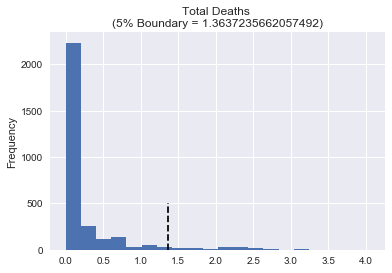

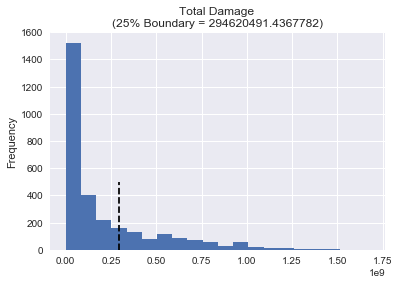

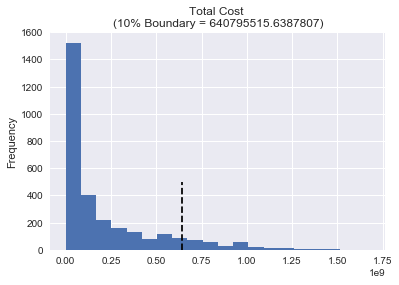

In [185]:
out['TotalDeaths'] = [sum(Deaths.iloc[i,:]) for i in range(len(out))]
fig, ax = plt.subplots()
q = out["TotalDeaths"].quantile(q=0.95)
q = np.round(q,20)
out["TotalDeaths"].plot(kind="hist", ax = ax, bins = 20)
ax.vlines(x=q,ymin=0,ymax=500,linestyle="--")
ax.set_title('Total Deaths \n(5% Boundary = {q})'.format(q=q))

out['TotalDamage'] = [sum(Damage.iloc[i,:]) for i in range(len(out))]
fig, ax = plt.subplots()
q = out["TotalDamage"].quantile(q=0.75)
q = np.round(q,20)
out["TotalDamage"].plot(kind="hist", ax = ax, bins = 20)
ax.vlines(x=q,ymin=0,ymax=500,linestyle="--")
ax.set_title('Total Damage \n(25% Boundary = {q})'.format(q=q))

out['TotalCost'] = [sum(Damage.iloc[i,:]) for i in range(len(out))]
fig, ax = plt.subplots()
q = out["TotalCost"].quantile(q=0.9)
q = np.round(q,20)
out["TotalCost"].plot(kind="hist", ax = ax, bins = 20)
ax.vlines(x=q,ymin=0,ymax=500,linestyle="--")
ax.set_title('Total Cost \n(10% Boundary = {q})'.format(q=q))

In [128]:
import functools

percentile10 = functools.partial(np.percentile, q=10)
percentile80 = functools.partial(np.percentile, q=80)
percentile90 = functools.partial(np.percentile, q=90)
percentile95 = functools.partial(np.percentile, q=95)

MAXIMIZE = ScalarOutcome.MAXIMIZE
MINIMIZE = ScalarOutcome.MINIMIZE
robustnes_functions = [ScalarOutcome('95th percentile A1Deaths', kind=MINIMIZE,
                             variable_name='A.1_Expected Number of Deaths', function=percentile95),
                       ScalarOutcome('95th percentile A2Deaths', kind=MINIMIZE,
                             variable_name='A.2_Expected Number of Deaths', function=percentile95),
                       ScalarOutcome('95th percentile A3Deaths', kind=MINIMIZE,
                             variable_name='A.3_Expected Number of Deaths', function=percentile95),
                       ScalarOutcome('95th percentile A4Deaths', kind=MINIMIZE,
                             variable_name='A.4_Expected Number of Deaths', function=percentile95),
                       ScalarOutcome('95th percentile A5Deaths', kind=MINIMIZE,
                             variable_name='A.5_Expected Number of Deaths', function=percentile95),
                       ScalarOutcome('80th percentile A1 Costs', kind=MINIMIZE,
                             variable_name='A.1_Dike Investment Costs', function=percentile80),
                       ScalarOutcome('80th percentile A2 Costs', kind=MINIMIZE,
                             variable_name='A.2_Dike Investment Costs', function=percentile80),
                       ScalarOutcome('80th percentile A3 Costs', kind=MINIMIZE,
                             variable_name='A.3_Dike Investment Costs', function=percentile80),
                       ScalarOutcome('80th percentile A4 Costs', kind=MINIMIZE,
                             variable_name='A.4_Dike Investment Costs', function=percentile80),
                       ScalarOutcome('80th percentile A5 Costs', kind=MINIMIZE,
                             variable_name='A.5_Dike Investment Costs', function=percentile80),
                       ScalarOutcome('80th percentile RFR Costs', kind=MINIMIZE,
                             variable_name='RfR Total Costs', function=percentile80),
                       ScalarOutcome('80th percentile Evacuation Costs', kind=MINIMIZE,
                             variable_name='Expected Evacuation Costs', function=percentile80)
                      ]
epsilon = [0.01] * len(dike_model.outcomes)

nfe = 1000

In [140]:
from ema_workbench.em_framework import sample_uncertainties

n_scenarios = 30
scenarios = sample_uncertainties(model, n_scenarios)

In [142]:
nfe = int(100)
with MultiprocessingEvaluator(model) as evaluator:
    robust_results = evaluator.robust_optimize(robustnes_functions),evaluator.robust_optimize(epsilons=[0.5,]*len(robustnes_functions))
    #evaluator.robust_optimize(scenarios),evaluator.robust_optimize(nfe=nfe)

[MainProcess/INFO] pool started
[MainProcess/INFO] terminating pool


TypeError: robust_optimize() missing 1 required positional argument: 'scenarios'

In [209]:
def calculate_maxregret(data, obj, policies):
    '''
    data : a data frame, no_policies X no_scenarios; namely the outcome for a particular outcome indicator
    obj : a string that indicates whether this outcome indicator is to be maximized or minimized
    returns a pandas Series (1d dataframe) with maximum regret values of each policy
    '''
    
    if obj == 'MAX':
        zero_regrets = np.max(data, axis=0)
        #zero_regrets = data.max(axis=0)
    elif obj == 'MIN':
        zero_regrets = np.min(data, axis=0)
    regrets = [abs(np.subtract(data[p], zero_regrets)) for p, pol in enumerate(policies)]
    #regrets = data.subtract(zero_regrets, axis=1)
    #regrets = regrets.abs()
    max_regrets = np.max(regrets, axis=1)
    #max_regrets = regrets.max(axis=1)
    return max_regrets

def calculate_min(data_t, obj, policies):
    if obj == 'MIN':
        fnc = max
    elif obj == 'MAX':
        fnc = min 
    minRes = fnc(data_t)
    return minRes

def calculate_signalNoise(data_t, obj, policies):
    if obj == 'MIN':
        score = (np.mean(data_t))*(np.std(data_t))
    elif obj == 'MAX':
        score = (np.mean(data_t))/(np.std(data_t))
    return score

def calculate_mean(data_t, obj, policies):
    mu = np.mean(data_t)
    return mu

def calculate_iqr(data_t, obj, policies):
    iqr = np.percentile(data_t, 75) - np.percentile(data_t, 25)
    return iqr

def calculate_skewness1(data_t, obj, policies):
    median = np.percentile(data_t, 50)
    numerator = (np.percentile(data_t, 90)+np.percentile(data_t, 10))/2
    denominator = (np.percentile(data_t, 90)-np.percentile(data_t, 10))/2
    if denominator == 0:
        skewness = 0
    else:
        skewness = (numerator-median)/denominator
    return skewness

def calculate_skewness2(data_t, obj, policies):
    median = np.percentile(data_t, 50)
    if np.std(data_t) == 0:
        skewness = 0
    else:
        skewness = (np.mean(data_t)-median)/np.std(data_t)
    return skewness

def calculate_kurtosis(data_t, obj, policies):
    numerator = np.percentile(data_t, 90)-np.percentile(data_t, 10)
    denominator = np.percentile(data_t, 75)-np.percentile(data_t, 25)
    if denominator == 0:
        kurtosis = 1
    else:
        kurtosis = numerator/denominator
    return kurtosis

def calculate_regret_thresholds(data_t, obj, policies, f=0.05):
    if obj == 'MAX':
        data_t = equalize_length_max(data_t, policies)
        zero_regrets = np.max(data_t, axis=0)
    elif obj == 'MIN':
        data_t = equalize_length_min(data_t, policies)
        zero_regrets = np.min(data_t, axis=0)
    no_scenarios = len(zero_regrets)
    regrets = [abs(np.subtract(data_t[p], zero_regrets)) for p, pol in enumerate(policies)] 
    percentages = []
    for p, pol in enumerate(policies):
        good_scenarios = [regret for r, regret in enumerate(regrets[p]) if regret <= f*zero_regrets[r]]
        percentages.append(float(len(good_scenarios))/no_scenarios)
    return percentages

experiments, outcomes = results
oois = {'Infectious population': 'MIN', 'Deceased population': 'MIN'} 
robustness_functions = {'worst case': calculate_min,
                       'max regret': calculate_maxregret,
                       'regret thresholds': calculate_regret_thresholds,
                       'signal noise': calculate_signalNoise,                 #signal instead of sigal
                       'mean': calculate_mean,
                       'iqr': calculate_iqr,
                       'skewness 1': calculate_skewness1,
                       'skewness 2': calculate_skewness2,
                       'kurtosis': calculate_kurtosis}
print('percentages')


percentages


In [206]:
def calculate_robustness_overtime(results, objectives, robustness_metric):
    '''
    results : the output obtained from exploration - a tuple of experiments, outcomes
    objectives : a dictionary of outcomes of interest and their objectives, i.e. MIN, MAX
    rob_fnc : a callable to calculate robustness, depending on the metric
    '''
    experiments, outcomes = results 
    policy_column = experiments['policy']
    policies = list(set(policy_column))
    rob_results = {}
    rob_function = robustness_functions[robustness_metric]
    
    if robustness_metric not in ['max regret', 'regret thresholds']:
        for policy in policies:
            rob_results[policy] = {}
            for ooi, obj in oois.items():
                rob_results[policy][ooi] = []
                data = outcomes[ooi][experiments['policy']==policy]
                for t in range(1, time_steps, 16):
                    data_t = data[:, t]
                    rob_results[policy][ooi].append(rob_function(data_t, obj, policies))
    
    else:
        for policy in policies:
            rob_results[policy] = {}
            for ooi, obj in objectives.items():                               # we changed it to objectives instead of oois
                for policy in policies:
                    rob_results[policy][ooi] = []
                    for p,policy in enumerate(policies):
                        rob_results[policy][ooi].append(regret_results[p])
                        return rob_results
                    print (rob_results)

In [207]:
from ema_workbench.analysis.plotting import lines 
from ema_workbench.analysis.plotting import envelopes
from ema_workbench.analysis.plotting_util import KDE
from ema_workbench.analysis.pairs_plotting import pairs_scatter
fig = scatterplot(results, density=KDE, fill=True) #   , group_by='policy'  This code is left out
plt.show()

NameError: name 'scatterplot' is not defined

In [200]:
robust_results = calculate_robustness_overtime(results, oois, 'max regret')
plot_robustness_overtime(rob_results, oois, 'max regret', experiments)
plot_robustness_overtime(rob_results, oois, 'worst', experiments)

NameError: name 'regret_results' is not defined